In [107]:
import numpy as np
import simulate
import matplotlib.pyplot as plt


# default params
m1 = 0.5 # mass 1 (msun)
m2 = 0.25 # mass 2 (msun)
r1 = 1.5e-2 # radius 1 (rsun)
r2 = 3e-2 # radius 2 (rsun)
a = 10e-2 # semimajor axis (rsun)
i = 80 # inclination (deg)
P0 = 0.005 # period (days)
sbratio = 0.5 # surface brightness ratio
Pdot = -1e-11 # rate of change of period (days/days)
freq_0 = P0/(60.*60*24)

# constants
G = 6.67*(10**-11) # grav constant (m^3/kg/s^2)
rsun = 6.957*(10**5) # solar radius (km)
msun = 1.989*(10**30) # solar mass (kg)
c = 299792458 # speed of light (m/s)


def mchirp(m1,m2):
    return (m1*m2)**3/5./(m1+m2)**1/5.

def freqs(times, Mchirp, f0=freq_0, t0=0):
    """
    INPUTS:
            times = time array
            
            f0 = starting frequency
            
            Mchirp = rate of change of frequency in kg
            
            t0 = start time
    """
    C0 = 96/5.*np.pi**(8/3.)*(G/c**3)**5/3.
    if t0==0:
            times=times-np.min(times)
    else:
            times=times-t0
    
    freqs=((C0*Mchirp**(5/3.)*times)*(-3/11.)+f0**(-14/3))**-3/14
    
    return freqs
    



def pdot_phasefold(times, P, Pdot, t0=0):
    """
    @author: kburdge
       
    Function which returns phases corresponding to timestamps in a lightcurve 
    given a period P, period derivative Pdot, and reference epoch t0
    
    If no reference epoch is supplied, reference epoch is set to earliest time in lightcurve
    
    INPUTS:
            times = time array (days)
            
            P = starting period
            
            Pdot = rate of change of period in units of time/time (days/day)
            
            t0 = start time
            
    OUTPUTS:
            phases = phases for given time array, period, and Pdot
    
    """
    
    if t0==0:
            times=times-np.min(times)
    else:
            times=times-t0
    
    phases=((times-1/2*Pdot/P*(times)**2) % P)/P
    
    return phases





In [108]:
time=simulate.time(n=1000)
pdot_f=pdot_phasefold(time, 0.005,1e-11, t0=0)
freqs=freqs(time, 1*msun,freq_0, t0=0)


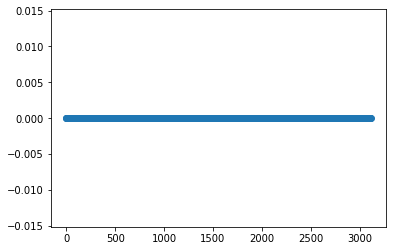

In [109]:
plt.scatter(np.range(10000000),freqs)